In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from scipy import stats
import pingouin as pg

# Chap 6. 상관분석
## 6-1 상관관계
- 두 변수의 선형적 관계 분석, 일반적으로 연속형변수 가정
- 선형 변환에 영향을 받지 않으며, xy, yx 상관계수는 대칭
- Pearson : 정규성의 가정 필요
- Spearman : 정규성을 충족하지 못하는 서열척도 데이터 => 순위 데이터 바탕으로 계산되므로 이상치에 덜 민감
- 두 경우의 수가 많이 다르면 이상점이 데이터에 포함되어 있을 수 있음

In [5]:
cats = pd.read_csv("data/cats.csv").drop(columns='rownames')
cats.head()

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3


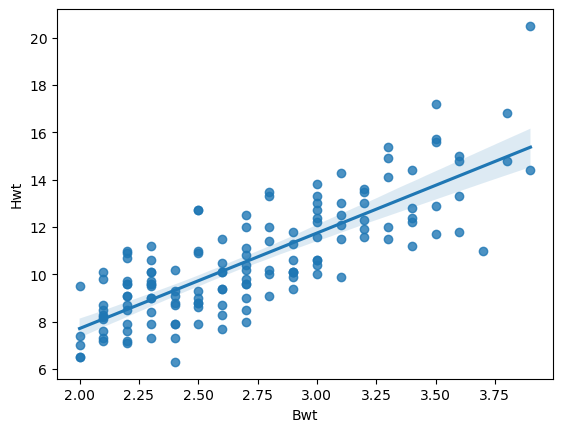

In [8]:
sns.regplot(x=cats['Bwt'], y=cats['Hwt']);

In [20]:
# 연속형 => pearson
cats[['Bwt', 'Hwt']].corr(method='pearson').iloc[0,1]
stats.pearsonr(cats['Bwt'], cats['Hwt'])

PearsonRResult(statistic=0.8041274235087924, pvalue=6.969044612860223e-34)

In [25]:
# 상관계수 통계적 검증 : 유의수준보다 작으므로 둘 사이는 상관관계 존재
stats.pearsonr(cats['Bwt'], cats['Hwt'])

PearsonRResult(statistic=0.8041274235087924, pvalue=6.969044612860223e-34)

In [24]:
cat_temp = cats.loc[cats['Sex']=="F"]
stats.pearsonr(cat_temp['Bwt'], cat_temp['Hwt'])

PearsonRResult(statistic=0.5320496665060397, pvalue=0.00011861701596435498)

In [28]:
iris = pd.read_csv("data/iris.csv").drop(columns='rownames')
iris_temp = iris.select_dtypes(exclude='object').corr()
iris_temp['Sepal.Length']

Sepal.Length    1.000000
Sepal.Width    -0.117570
Petal.Length    0.871754
Petal.Width     0.817941
Name: Sepal.Length, dtype: float64

In [37]:
# 2개를 초과하는 변수에 대한 상관계수 & 유의성
temp = iris.select_dtypes(exclude='object')
for i in range(len(temp.columns)):
    for j in range(i+1, len(temp.columns)):
        print(f"{temp.columns[i]} vs {temp.columns[j]} : {stats.pearsonr(temp[temp.columns[i]], temp[temp.columns[j]])[1]:.3f}")

Sepal.Length vs Sepal.Width : 0.152

Sepal.Length vs Petal.Length : 0.000

Sepal.Length vs Petal.Width : 0.000

Sepal.Width vs Petal.Length : 0.000

Sepal.Width vs Petal.Width : 0.000

Petal.Length vs Petal.Width : 0.000


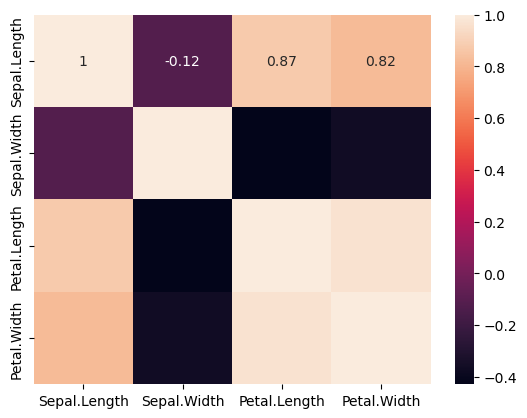

In [32]:
sns.heatmap(iris.select_dtypes(exclude='object').corr(),annot=True);

## 6-2 편상관관계
- 하나 이상의 다른 변수의 영향을 통제한 상태에서 관심의 대상인 두 변수 간의 선형적 관련성을 측정

In [39]:
cars = pd.read_csv("data/mtcars.csv")[["mpg", "cyl", "hp", "wt"]]
cars.pcorr()

,mpg,cyl,hp,wt
mpg,1.000000,-0.307369,-0.275893,-0.628556
cyl,-0.307369,1.000000,0.534091,0.222447
hp,-0.275893,0.534091,1.000000,-0.157464
wt,-0.628556,0.222447,-0.157464,1.000000


In [40]:
pg.partial_corr(data=cars, x='mpg', y='hp', covar=['cyl', 'wt'])

,n,r,CI95%,p-val
pearson,32,-0.275893,"[-0.58, 0.09]",0.140015


In [41]:
pg.partial_corr(data=cars, x='mpg', y='hp', covar=['cyl', 'wt'])['n']

pearson    32
Name: n, dtype: int64